One can start from this notebook, when working with Raman measurements. Just change the data path below to point to your exported Raman measurements in text files.
The Raman measurements need to be exported from Witec Project as *table* and make sure to have the Raman shift dimensions in cm$^{-1}$.

To use this notebook on your PC, the data needs to be loaded as described below, in section [Loading on PC](#Loading-on-PC).

In [1]:
%load_ext autoreload
%autoreload 2S

In [2]:
import ramantools as rt
import glob, sys
import pylab as pl
import numpy as np
import xarray as xr

In [3]:
%matplotlib inline

# Loading a Raman map

For this we need to load the map, exported as *table* from *Witec Project* or *Witec Control*, as well as the text file next to the map. This text file is used to read the metadata of the Raman measurement.

## Loading on PC

<mark>You do not need to run this section when working in *binder*.</mark>

**Skip to [Loading test data from a URL](#Loading-test-data-from-a-URL)**.

In [4]:
data_path = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\ABC\G peak anomaly\Raman measurements'
data_path += '\\'
sys.path.append(data_path)

Need to add `r` in front of the file path to treat it as a *raw string*, meaning that `\` is treated as a character.

Using `glob` to read the contents to the data folder above. The use of `glob` helps with searching for files according to patterns. See below, where we identify the map called: *ABC_36* and load its contents, including the text file containing the metadata.

In [ ]:
# list all the files in the data folder
glob.glob(data_path + '*')

In [5]:
map_path = glob.glob(data_path + '*ABC_36*' + '*Data*')[0]
info_path = glob.glob(data_path + '*ABC_36*' + '*Information*')[0]

The above is something you would do on your PC. In this online notebook, we will load the data from a URL.

## Loading test data from a URL

For use only in this tutorial.

In [6]:
import urllib

In [7]:
# link to datafile
datalink = 'https://public.ek-cer.hu/~nemes/testdata/FLG36.MK_FLG_ABC_36--Scan%20Piezo--013--Spec.Data%201.txt'
# link to infofile
infolink = 'https://public.ek-cer.hu/~nemes/testdata/FLG36.MK_FLG_ABC_36--Scan%20Piezo--013--Information.txt'

In [8]:
f = urllib.request.urlopen(datalink)
myfile = f.read().decode('latin1').replace('\n', ' ')
with open('data.txt', mode = 'w', encoding = 'latin1') as f:
    f.write(myfile)

In [9]:
f = urllib.request.urlopen(infolink)
myfile = f.read().decode('latin1').replace('\n', ' ')
with open('info.txt', mode = 'w', encoding = 'latin1') as f:
    f.write(myfile)

In [4]:
map_path = 'data.txt'
info_path = 'info.txt'

## Working with `ramantools`

Load the Raman map by passing the path of the map file and the info file to the `ramanmap` class. Let's call it `m`.

In [6]:
m = rt.ramanmap(map_path, info_path)

`rt.ramanmap(map_path, info_path)` returns a `ramanmap` object, which among other data, contains as variables:
- the raw imported, Raman measurements are stored in: `m.map`
- all the metadata in: `m.metadata`. The `m.print_metadata()` function, prints the contents of the info file.
- The Raman shift of the measurement is stored in `m.ramanshift`

In addition to the above, the `ramanmap` object, called `m` in this example has the following variables, mostly containing the measurement metadata:

In [31]:
list(m.__dict__)

['metadata',
 'mapname',
 'pixel_x',
 'pixel_y',
 'size_x',
 'size_y',
 'date',
 'time',
 'samplename',
 'laser',
 'itime',
 'grating',
 'objname',
 'objmagn',
 'positioner_x',
 'positioner_y',
 'ramanshift',
 'map',
 'metadata_datafile',
 'wipfilename',
 'mapxr']

The Raman shift is stored in the variable: `m.ramanshift`

In [381]:
m.ramanshift

array([-639.473, -635.679, -631.886, ..., 4014.87 , 4017.1  , 4019.33 ])

## The Raman map in `xarray`

The data is also loaded into an `xarray` container. This can be found in the `mapxr` variable of the `ramanmap` object.

In [7]:
# let's just call this `xr` for ease of use.
xrm = m.mapxr

These are the metadata loaded also into the xarray. For example this makes plotting easier by including the relevant metadata as axis labels, etc.

In [25]:
xrm.attrs

{'comments': 'raw data loaded\n',
 'wipfile name': 'C:\\Users\\zrbyt\\OneDrive - energia.mta.hu\\Documents\\work_MFA\\ABC\\G peak anomaly\\Raman measurements\\FLG36.wip',
 'units': 'au',
 'long_name': 'Raman intensity',
 'sample name': 'MK_FLG_ABC_36',
 'laser excitation': '487.986 nm',
 'time of measurement': '14:16:33',
 'date of measurement': '2023. május 25., csütörtök',
 'integration time': '0.5 s',
 'map width': '97.0 um',
 'map height': '77.0 um',
 'sample positioner X': -1470.0,
 'sample positioner Y': 1170.6,
 'objective name': 'Zeiss EC Epiplan-Neofluar Dic 50x / 0.8',
 'objective magnification': '50.0x',
 'grating': 'G1: 600 g/mm BLZ=500nm'}

In [26]:
print(xrm.attrs['comments'])

raw data loaded



In [9]:
xrm.attrs['map width'], xrm.attrs['map height']

('97.0 um', '77.0 um')

We can see that the map is 77x97 $\mu m$ in size. Let's select a spectrum from somewhere in the middle and plot it.

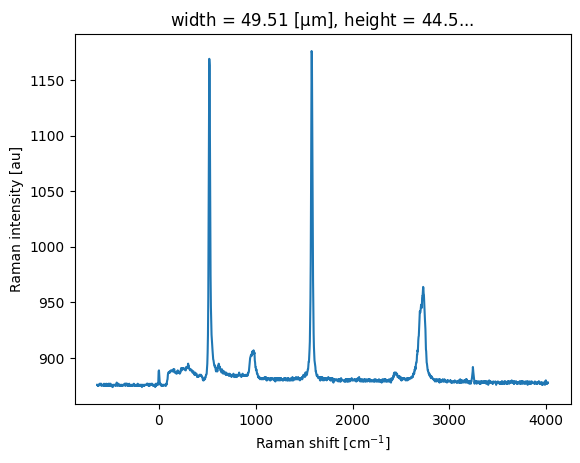

In [10]:
_ = xrm.sel(width = 50, height = 45, method = 'nearest').plot()

Let's zoom in on the G peak area, by slicing, ie. giving a range of values to plot, using the `slice()` function. For this we need to use another `sel()` function.
One can pass options to the `plot()` function, similarly to a normal matplotlib plot. In this case, I've specified the marker and the color of the plot.

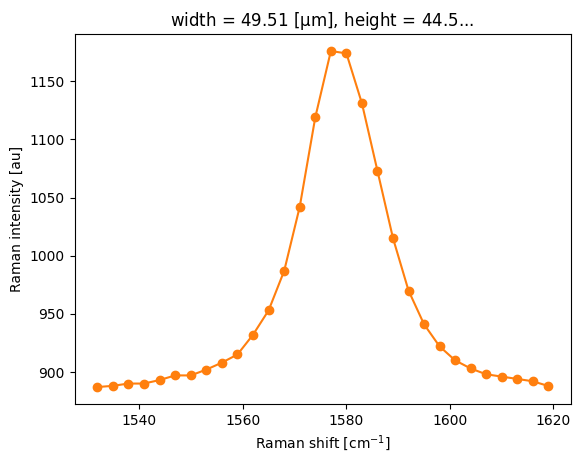

In [38]:
singlespec = xrm.sel(width = 50, height = 45, method = 'nearest')
singlespec.sel(ramanshift = slice(1530, 1620)).plot(marker = 'o', color = 'tab:orange')

Ok. Now let's plot the intensity of the G peak over the whole map.

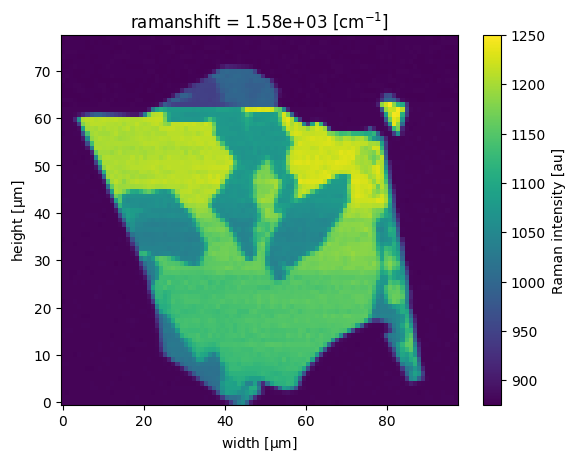

In [39]:
xrm.sel(ramanshift = 1580, method = 'nearest').plot()

`ramantools` has a built in function `plotspec()`, which can be used to quickly plot the position of a single spectrum on the map. This takes the arguments of an `xarray` object and the coordinates at which we can plot it. Furthermore, it takes a Raman shift as the last argument, at which to plot the Raman intensity in the map.

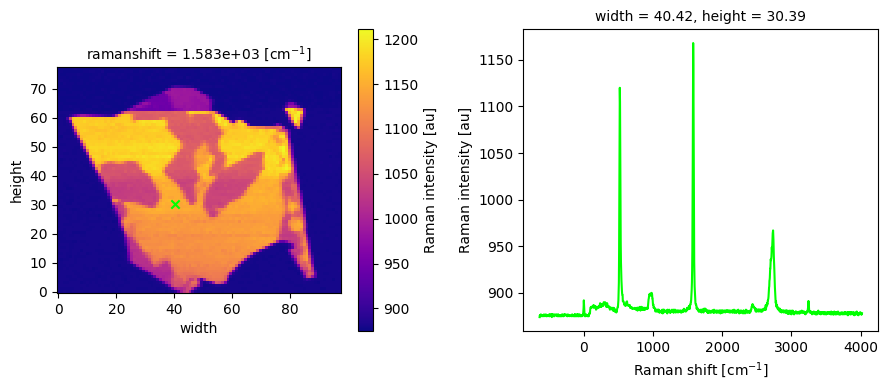

In [62]:
rt.plotspec(xrm, 40, 30, 1583)

For more complicated plots, you can just do whatever you need by hand. It's very simple with `xarray`, just look at how it's done in the source file: `ramantools.py`.

# Loading single Raman spectra

For this we will use the test data on Github, in the folder: 'test data'

In [8]:
data_path_ss = 'test data/FLG36.MK_FLG_ABC_36--Spectrum--001--Spec.Data 1.txt'
info_path_ss = 'test data/FLG36.MK_FLG_ABC_36--Spectrum--001--Information.txt'

In [9]:
singlespec = rt.singlespec(data_path_ss, info_path_ss)

For single spectra, we also get an `xarray` object, called `ssxr`. 

We can plot this similarly to the map. This has only one coordinate.

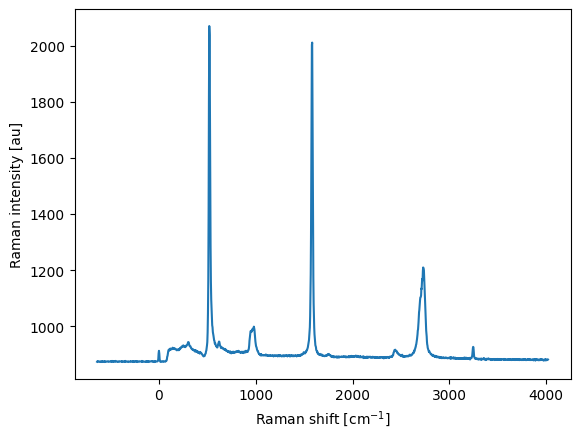

In [36]:
singlespec_plot = singlespec.ssxr.plot()

In [33]:
singlespec.ssxr.attrs

{'comments': 'raw data loaded \n',
 'wipfile name': 'C:\\Users\\zrbyt\\OneDrive - energia.mta.hu\\Documents\\work_MFA\\ABC\\G peak anomaly\\Raman measurements\\FLG36.wip',
 'units': 'au',
 'long_name': 'Raman intensity',
 'sample name': 'MK_FLG_ABC_36',
 'laser excitation': '487.986 nm',
 'time of measurement': '13:58:55',
 'date of measurement': '2023. május 25., csütörtök',
 'integration time': '3.0 s',
 'sample positioner X': -1466.3,
 'sample positioner Y': 1170.6,
 'sample positioner Z': 0.0,
 'objective name': 'Zeiss EC Epiplan-Neofluar Dic 100x / 0.9',
 'objective magnification': '100.0x',
 'grating': 'G1: 600 g/mm BLZ=500nm'}

# More advanced data manipulation

## Subtracting background

First thing we do is we can subtract the background from the spectra. One can easily do arthmetic with an `xarray` DataArray. Let's just subtract 800 from the spectra in the map.

In [37]:
single_bgsub = singlespec.ssxr - 850

As you can see this is just another `xarray` object, with the Raman intensity values being smaller by 800.

In [38]:
single_bgsub

<xarray.DataArray (ramanshift: 1600)>
array([24., 26., 25., ..., 31., 31., 32.])
Coordinates:
  * ramanshift  (ramanshift) float64 -639.5 -635.7 ... 4.017e+03 4.019e+03

The attributes from the old `xarray` object are not carried over to the new one. One reason for this is that units are generally stored in attributes and most of the time arithmetic involves changes in units.

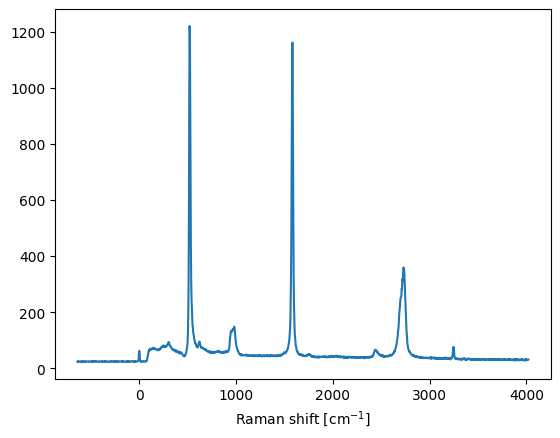

In [40]:
single_bgsub.plot()

## Background subtraction by fitting to the baseline

### Single spectra

Let's try this for a single spectrum. This can be done by the `remove_bg()` method of the `singlespec` class.
Usually this can be run without any arguments. In this case the method tries to find the peaks and disregard their surroundings. More details in the [documentation](https://zrbyte.github.io/ramantools/index.html).

In [99]:
single_spec_nobg = singlespec.remove_bg()

Let's see the result, by plotting it:

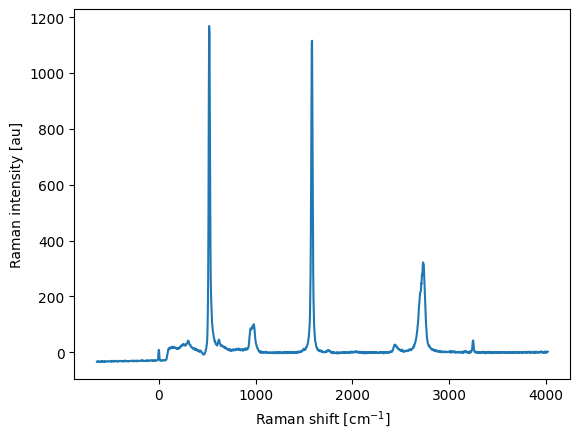

In [82]:
single_spec_nobg.plot()

Many optional arguments can be passed to `remove_bg()`, the list can be found [here](https://zrbyte.github.io/ramantools/ramantools.html#ramantools.bgsubtract).

Th eabove background fit looks quite good, but we can try to visualize what it's doing, by passing it the `toplot = True` option.

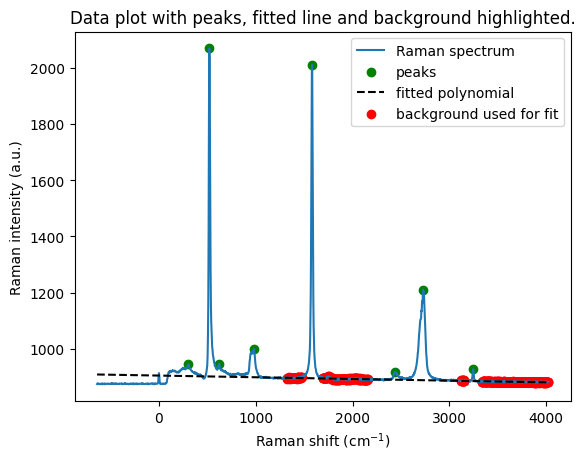

In [103]:
single_spec_nobg = singlespec.remove_bg(toplot = True)

We can see that `remove_bg()` has found the peaks marked by green dots and disregarded the area around them. The fitting parameters can be found in the 'comments' attribute of the returned `xarray` instance.

In [102]:
print(single_spec_nobg.attrs['comments'])

raw data loaded 
background subtracted, with parameters: {'polyorder': 1, 'hmin': 50, 'hmax': 10000, 'wmin': 4, 'wmax': 60, 'prom': 10, 'exclusion_factor': 6, 'peak_pos': None}



This 'comments' field also acts as a log of what happened to the data, as we work with the `ramantools` methods and functions that act on `xarray` objects.

Let's try to change the polynomial order to 2 and give the peaks to be fit by hand:

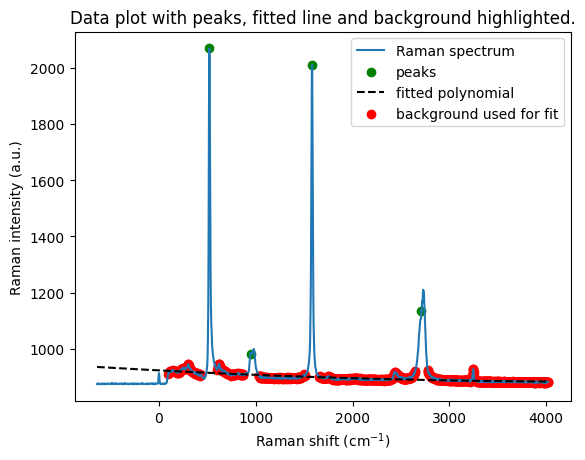

In [112]:
single_spec_nobg = singlespec.remove_bg(
    toplot = True,
    polyorder = 2,
    peak_pos = [520, 950, 1583, 2710])
# The position of the peaks to be removed is given in a list

We can see that not all of the peaks, especially the 2D peak is not removed entirely, we can correct this be either increasing the `wmin` parameter, which is the minimum width of the peaks considered by the method, or by increasing the `exclusion_factor` parameter. This last parameter means: how much of the FWHM of the peak (defined by `wmin`) is removed.

Let's change `wmin` to 12.

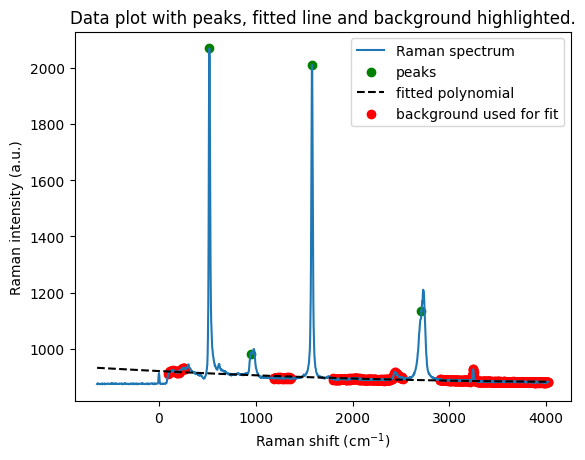

In [117]:
single_spec_nobg = singlespec.remove_bg(
    toplot = True,
    polyorder = 2,
    peak_pos = [520, 950, 1583, 2710],
    wmin = 12)

This is much better, giving us a nice second order fit.

Final tweaks: If we don't want the area around 0 cm$^{-1}$, we can just "add a peak there". Let's change back to linear fit.

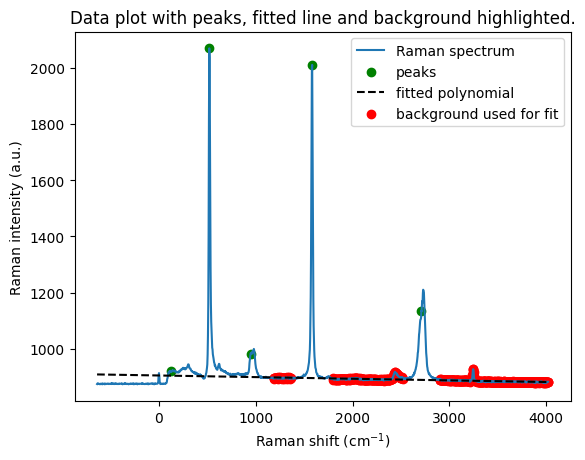

In [121]:
single_spec_nobg = singlespec.remove_bg(
    toplot = True,
    polyorder = 1,
    peak_pos = [120, 520, 950, 1583, 2710],
    wmin = 12)

The returned `xarray` instance has the same attributes as the original, with the "comments" field appended.

In [124]:
single_spec_nobg.attrs

{'comments': "raw data loaded \nbackground subtracted, with parameters: {'polyorder': 1, 'hmin': 50, 'hmax': 10000, 'wmin': 12, 'wmax': 60, 'prom': 10, 'exclusion_factor': 6, 'peak_pos': [120, 520, 950, 1583, 2710]}\n",
 'wipfile name': 'C:\\Users\\zrbyt\\OneDrive - energia.mta.hu\\Documents\\work_MFA\\ABC\\G peak anomaly\\Raman measurements\\FLG36.wip',
 'units': 'au',
 'long_name': 'Raman intensity',
 'sample name': 'MK_FLG_ABC_36',
 'laser excitation': '487.986 nm',
 'time of measurement': '13:58:55',
 'date of measurement': '2023. május 25., csütörtök',
 'integration time': '3.0 s',
 'sample positioner X': -1466.3,
 'sample positioner Y': 1170.6,
 'sample positioner Z': 0.0,
 'objective name': 'Zeiss EC Epiplan-Neofluar Dic 100x / 0.9',
 'objective magnification': '100.0x',
 'grating': 'G1: 600 g/mm BLZ=500nm'}

In [125]:
print(single_spec_nobg.attrs['comments'])

raw data loaded 
background subtracted, with parameters: {'polyorder': 1, 'hmin': 50, 'hmax': 10000, 'wmin': 12, 'wmax': 60, 'prom': 10, 'exclusion_factor': 6, 'peak_pos': [120, 520, 950, 1583, 2710]}



The ammented "comments" acts as a log of the parameters used for fitting.

Let's plot the result:

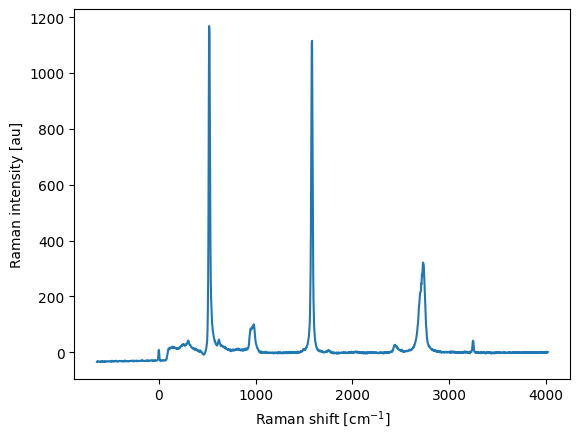

In [122]:
single_spec_nobg.plot()

### Background fitting for maps

In [10]:
xrm

<xarray.DataArray (ramanshift: 1600, height: 77, width: 97)>
array([[[877., 877., 876., ..., 876., 876., 876.],
        [877., 877., 877., ..., 876., 876., 876.],
        [877., 877., 876., ..., 876., 877., 876.],
        ...,
        [875., 875., 875., ..., 875., 875., 875.],
        [875., 875., 874., ..., 875., 875., 875.],
        [875., 875., 875., ..., 874., 874., 874.]],

       [[877., 876., 877., ..., 876., 878., 878.],
        [877., 877., 877., ..., 877., 877., 876.],
        [876., 876., 877., ..., 878., 877., 877.],
        ...,
        [876., 875., 875., ..., 876., 874., 876.],
        [874., 875., 875., ..., 875., 875., 875.],
        [875., 875., 875., ..., 874., 874., 874.]],

       [[877., 876., 876., ..., 877., 876., 878.],
        [877., 877., 877., ..., 876., 877., 878.],
        [876., 877., 877., ..., 877., 878., 876.],
        ...,
...
        ...,
        [876., 876., 876., ..., 876., 875., 874.],
        [875., 875., 875., ..., 876., 874., 874.],
        [874., 874., 874., ..., 875., 876., 875.]],

       [[877., 877., 878., ..., 876., 878., 877.],
        [878., 877., 877., ..., 877., 878., 878.],
        [877., 877., 877., ..., 877., 877., 878.],
        ...,
        [875., 875., 876., ..., 875., 875., 876.],
        [875., 875., 875., ..., 875., 875., 875.],
        [874., 874., 875., ..., 875., 875., 875.]],

       [[878., 879., 877., ..., 877., 877., 878.],
        [877., 876., 876., ..., 877., 877., 877.],
        [877., 878., 878., ..., 877., 877., 877.],
        ...,
        [875., 876., 875., ..., 876., 875., 875.],
        [875., 874., 874., ..., 876., 876., 876.],
        [875., 875., 875., ..., 876., 876., 874.]]])
Coordinates:
  * ramanshift  (ramanshift) float64 -639.5 -635.7 ... 4.017e+03 4.019e+03
  * width       (width) float64 0.0 1.01 2.021 3.031 ... 93.97 94.98 95.99 97.0
  * height      (height) float64 0.0 1.013 2.026 3.039 ... 74.97 75.99 77.0
Attributes: (12/16)
    comments:                 raw data loaded \n
    wipfile name:             C:\Users\zrbyt\OneDrive - energia.mta.hu\Docume...
    units:                    au
    long_name:                Raman intensity
    sample name:              MK_FLG_ABC_36
    laser excitation:         487.986 nm
    ...                       ...
    map height:               77.0 um
    sample positioner X:      -1470.0
    sample positioner Y:      1170.6
    objective name:           Zeiss EC Epiplan-Neofluar Dic 50x / 0.8
    objective magnification:  50.0x
    grating:                  G1: 600 g/mm BLZ=500nm

In [22]:
middle = xrm.sel(width = m.size_x/2, height = m.size_y/2, method = 'nearest')

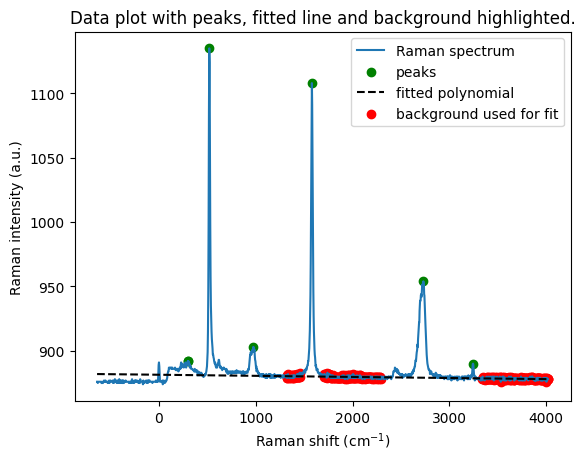

In [28]:
y_data_nobg, bg_values, coeff, params_used_at_run, mask = rt.bgsubtract(middle.coords['ramanshift'].data, middle.data, toplot = True)

In [36]:
import dask.array as da

In [37]:
# Ensure that your DataArray is chunked in dask
xrm = xrm.chunk({'height': 10, 'width': 10})

In [ ]:
def wrapped_bgsubtract(y_data):
    y_data_nobg, bg_values, coeff, params_used_at_run, mask = bgsubtract(x_data=data['ramanshift'], y_data=y_data)
    return y_data_nobg

# Apply the function along the 'ramanshift' dimension
result = xr.apply_ufunc(
    wrapped_bgsubtract,
    data,
    input_core_dims=[['ramanshift']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float]
)

# Compute the result
result = result.compute()


## Curve fitting

One can either use the basic functionality of `curvefit` from the `scipy` package, which works on `numpy` arrays. However, `xarray` also has a built in functionality for curve fitting, where the end result is also an xarray object. This is just a wrapper around `scipy.optimize.curvefit`, so usage is similar.

Let's try the curvefit in `xarray`. First we will define a Lotentz function.

In [48]:
def lorentz(x, x0, a, gamma, offset):
    return offset + a*(gamma/(2*np.pi))**2 / ((gamma/2)**2 + (x - x0)**2)

def lorentz2(x, x01, a1, gamma1, x02, a2, gamma2, offset):
    return offset + a1*(gamma1/(2*np.pi))**2 / ((gamma1/2)**2 + (x - x01)**2) + a2*(gamma2/(2*np.pi))**2 / ((gamma2/2)**2 + (x - x02)**2)

In [49]:
xr = m.mapxr

In [50]:
gpeak = xrm.sel(ramanshift = slice(1530, 1620)).sel(width = 40, height = 35, method = 'nearest')

In [51]:
fit = gpeak.curvefit('ramanshift', lorentz,
                    p0 = {
                        'x0': 1582,
                        'a': 1000,
                        'gamma': 15,
                        'offset': 850
                    },
                     bounds = {'gamma': [0, 100]}
                    )

In [52]:
fit

<xarray.Dataset>
Dimensions:                (param: 4, cov_i: 4, cov_j: 4)
Coordinates:
    width                  float64 40.42
    height                 float64 35.46
  * param                  (param) <U6 'x0' 'a' 'gamma' 'offset'
  * cov_i                  (cov_i) <U6 'x0' 'a' 'gamma' 'offset'
  * cov_j                  (cov_j) <U6 'x0' 'a' 'gamma' 'offset'
Data variables:
    curvefit_coefficients  (param) float64 1.581e+03 2.936e+03 15.61 873.3
    curvefit_covariance    (cov_i, cov_j) float64 0.008382 -0.007269 ... 2.642

In [53]:
fit['curvefit_coefficients'].data

array([1580.78470524, 2935.54672181,   15.61155106,  873.34590635])

In [54]:
rs = np.linspace(1500, 1700, num = 100)

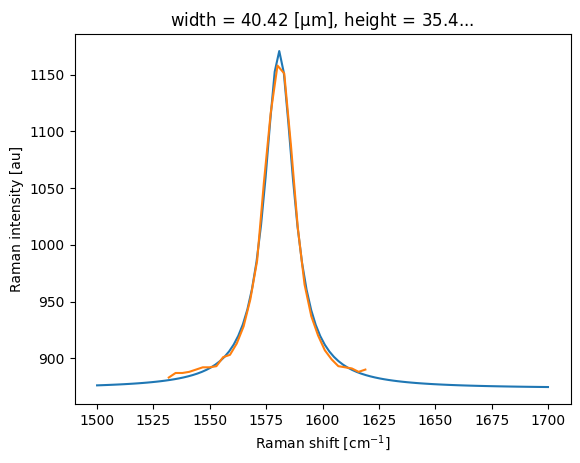

In [55]:
pl.plot(rs, lorentz(rs, *fit['curvefit_coefficients'].data))
gpeak.plot()

Fitting to the entire map.

In [56]:
gpeak_map = xrm.sel(ramanshift = slice(1530, 1620))

In [57]:
import time

In [58]:
start_time = time.time()
fit_map = gpeak_map.curvefit(
    'ramanshift',
    lorentz,
    p0 = {
        'x0': 1582,
        'a': 2500,
        'gamma': 15,
        'offset': 850
    },
    bounds = {
        'x0': [1570, 1590],
        'gamma': [8, 50]
    },
    errors = 'ignore'
)
end_time = time.time()
runtime = end_time - start_time
print(runtime, 'seconds')

59.59739565849304 seconds


In [59]:
fit_map

<xarray.Dataset>
Dimensions:                (width: 97, height: 77, param: 4, cov_i: 4, cov_j: 4)
Coordinates:
  * width                  (width) float64 0.0 1.01 2.021 ... 94.98 95.99 97.0
  * height                 (height) float64 0.0 1.013 2.026 ... 74.97 75.99 77.0
  * param                  (param) <U6 'x0' 'a' 'gamma' 'offset'
  * cov_i                  (cov_i) <U6 'x0' 'a' 'gamma' 'offset'
  * cov_j                  (cov_j) <U6 'x0' 'a' 'gamma' 'offset'
Data variables:
    curvefit_coefficients  (height, width, param) float64 1.57e+03 ... 877.0
    curvefit_covariance    (height, width, cov_i, cov_j) float64 194.8 ... 0....

Let's select the width parameter: `gamma` from among the fit parameters and plot it on a density plot.

In [60]:
gwidth = fit_map['curvefit_coefficients'].sel(param = 'gamma')

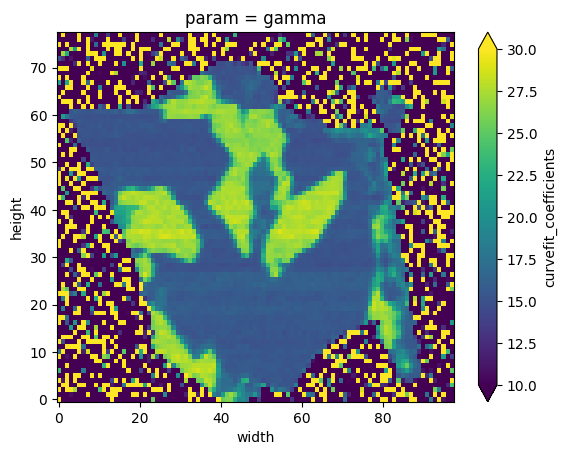

In [61]:
gwidth.plot(vmin = 10, vmax = 30)